<a href="https://colab.research.google.com/github/lesarmiento37/coder-proyecto/blob/main/Practico_final_segunda_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modelo  de Riesgo Crediticio**

## **Objetivo**
Se realizara  un modelo de riesgo crediticio basado en datos en Python para predecir las probabilidadesde incumplimiento (PD) y asignar puntajes crediticios a los prestatarios existentes o potenciales. 

Se determinarán los puntajes de crédito utilizando un cuadro de mando altamente interpretable, fácil de entender e implementar que hace que calcular el puntaje de crédito sea muy sencillo.

## **Universo**



Los datos sin procesar incluyen información sobre más de 450 000 préstamos de consumo emitidos entre 2007 y 2014 con casi 75 características, incluido el estado actual del préstamo y varios atributos relacionados con los prestatarios y su comportamiento de pago.
Esta informacion la hemos extraido del siguiente **Kaggle**:>>>https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03


El data set utilizado para la elaboracion del modelo de Riesgo Crediticio se encuentra en el siguiente **enlace**>>>> https://drive.google.com/file/d/1uW5U4ogQp17nFMBAhPr8iiaJBZdOnetM/view?usp=sharing

La explicacion de las 75 variables se encuentra en el siguiente **diccionario**:

https://docs.google.com/spreadsheets/d/1N05RNr2ajsTg9xXxebE6PPd2uzpEAzAF/edit?usp=sharing&ouid=106736825120722139781&rtpof=true&sd=true


a los fines practicos solamente  se han traducido  las variables relevantes.


La **resolucion final del Kaggle original** se encuentra en el siguienbte enlace:
https://colab.research.google.com/github/finlytics-hub/credit_risk_model/blob/master/Credit_Risk_Model_and_Credit_Scorecard.ipynb

se ha utilizado  este modelo como guia, sin embargo , el desarrollo del modelo de riesgo crediticio se  ha realizado siguiendo los pasos vistos  en clase.

## **Tarea Realizada**
Las tareas realziadas principalmente fueron:

*   Importacion de librerias
*   Data mining (Eliminacion de las variables rebundantes, tratamiento de las 
    variables categoricas, Nan, etc.)
*   Determinacion de la variables a traves  del analisis Annova ( Analisis 
    Multivariado).
*   Anaisis Univariados y bivariado sobre los features Obtenidos
*   Particion del modelo en 70% y 30%
*   Se utilizo los Algoritmos de  Arbol de Decision y Random Forest
*   Conclusion=La utilizacion de estos modelos da como resultado un    
    Overfifting,  se ajustara las variables  del modelo.
















### **Desarrollo del Modelo de Riesgo Crediticio**

In [1]:
#Importamos las librerias
import pandas as pd
#import plotly.express as px
%matplotlib inline
#import pandas_profiling
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from seaborn import distplot
#import missingno as msno
from seaborn import distplot
from seaborn import boxplot
from seaborn import violinplot
#from google.colab import drive
from sklearn.tree import DecisionTreeClassifier,plot_tree
#import missingno as msno
import scipy.stats as stats

In [2]:
ruta_doc='C:/Users/vn52rr7/Desktop/personal/data science/practico final/loan_data_2007_2014.csv'
#ruta_doc='loan_data.csv'
#ruta_doc='/content/loan_data.csv'

In [3]:
#cargamos el data set
tabla= pd.read_csv(ruta_doc,sep=',',encoding='latin-1')


In [4]:
tabla.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# a traves de la  siguiente formula determinamos  que el dataset tiene 74 columnas  107.581 filas
#print(tabla.shape)

In [6]:
#Por medio de la siguiente grafica se puede visualizar cada variable y la cantidad de informacion que contiene cada una de ellas, 
#hay 17 variables  que no tienen  datos
#msno.matrix(tabla)
#msno.bar(tabla)

#                                              Data Mining (Limpieza de datos)


In [7]:
#A fin de  borrar las 17 variables que tienen cero datos se procede aplicar  un dropna con un scope del 80%, se considera  que con este scope 
#se borra estas variables sin afectar otras variables  que contienen datos y Nan a la vez.

tabla.dropna(thresh = tabla.shape[0]*0.2, how = 'all', axis = 1, inplace = True)


In [8]:
#Se borran las columnas redundantes estas variables no tienen incidencia estadisticas, es informacion particular y de  contacto del tomador 
#del prestamo, falta la variable id, la cual  se  borra luego de completar la limpieza de los  nan.
tabla.drop(columns = ['policy_code','addr_state','member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title','zip_code','recoveries', 'collection_recovery_fee','total_rec_prncp', 'total_rec_late_fee','application_type'], inplace = True)

Tratamiento de las variables categoricas y NAN

In [9]:
#variable 'emp_length', esta variable corresponde a la antiguedad en el empleo,  se visualiza donde se encuentran la mayor concentracion de datos
#tabla.groupby('emp_length').id.count()

In [10]:
#  se  concluye reemplazar los datos faltante  en esta variable - con  el grupo  "antiguedad  10+ years"
tabla.emp_length.fillna('10+ years',inplace=True)

In [11]:
# la variable emp_length se corrige y se convierte a variable numerica
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
                                         

In [12]:
emp_length_converter(tabla,'emp_length')

In [13]:
# A continuacion  tratamos  las variable s con fechas en sus variables, convertimos  el dato de fecha a formato data time de las variables
# 'earliest_cr_line','issue_d', 'last_pymnt_d' , 'last_credit_pull_d'y 'next_pymnt_d'

def date_columns(tabla, column):
    tabla[column] = pd.to_datetime(tabla[column], format = "%b-%y")
   #create a new column as a difference between today and the respective date
    today_date = pd.to_datetime('2022-03-29')
    # calculate the difference in months and add to a new column
    tabla['mths_since_' + column] = round(pd.to_numeric((today_date - tabla[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    tabla['mths_since_' + column] = tabla['mths_since_' + column].apply(lambda x: tabla['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    tabla.drop(columns = [column], inplace = True)


In [14]:
date_columns(tabla, 'earliest_cr_line')
date_columns(tabla, 'issue_d')
date_columns(tabla, 'last_pymnt_d')
date_columns(tabla, 'last_credit_pull_d')

In [15]:
pd.to_datetime(tabla['next_pymnt_d'], format = "%b-%y")

0               NaT
1               NaT
2               NaT
3               NaT
4        2016-02-01
            ...    
466280   2016-02-01
466281          NaT
466282   2016-02-01
466283          NaT
466284   2016-02-01
Name: next_pymnt_d, Length: 466285, dtype: datetime64[ns]

TRATAMIENTO DE LOS NAN

Se detalla a continuacion  los nan que presisten

In [16]:
# las siguientes variables   tienen un alto indice de nan, se analizo cada variable en particular y se determino rellenarlas con cero 
# dado que es razonable que no tengan datos,  a continuacion se explica en detalle cada variable:
#mths_since_last_delinq=  número de meses desde la última morosidad del prestatario ( es razonable que   exista un al to indice de personas no morosas)
# mths_since_last_major_derog = Meses desde la calificación más reciente de 90 días o mas (idem anterior)
#tot_coll_amt= Montos totales de cobro alguna vez adeudados, (monto insignificante)
#tot_cur_bal=Saldo actual total de todas las cuentas (monto insignificante)
#total_rev_hi_lim= Límite de crédito/crédito superior renovable total (monto insignificante)
#next_pymnt_d= fecha de proximo pago ,( es razonable que no tenga datos ya que hay creditos que han sido cancelados a la fecha del analisis)
#Se rellena el resto de las variables con cero porque en porcentaje representan menos del 5% del total del universo
tabla.mths_since_last_delinq.fillna(0,inplace=True)
tabla.tot_coll_amt.fillna(0,inplace=True)
tabla.tot_cur_bal.fillna(0,inplace=True)
tabla.total_rev_hi_lim.fillna(0,inplace=True)
tabla.next_pymnt_d.fillna(0,inplace=True)



Variable '**delinq_2yrs'**, es el numero de morosidad de mas de 30 dias en los 
ultimos 2 años,

<AxesSubplot:ylabel='Frequency'>

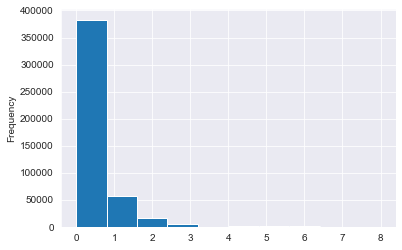

In [17]:
tabla[tabla['delinq_2yrs']< 9.]['delinq_2yrs'].plot.hist()

*Se observa en el histograma   que la mayoria de los datos de esta variable se en encuentra en el grupo 0.0*

In [18]:
# se rellena los nan  con 0.0
tabla.delinq_2yrs.fillna(0.0,inplace=True)

variable '**inq_last_6mths**', corresponde  las consultas de los ultimos 6 meses,

<AxesSubplot:ylabel='Frequency'>

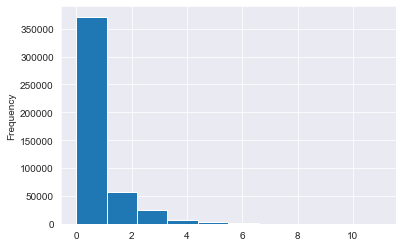

In [19]:
tabla[tabla['inq_last_6mths']< 12.]['inq_last_6mths'].plot.hist()

*Se observa en el histograma   que la mayoria de los datos de esta variable se en encuentra en el grupo 0.0*

In [20]:
# se rellena los nan  con 0.0
tabla.inq_last_6mths.fillna(0.0,inplace=True)

variable '**annual_inc **', corresponde  a los ingresos anuales.

<AxesSubplot:ylabel='Frequency'>

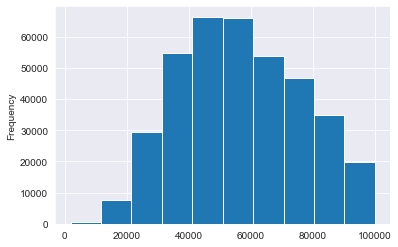

In [21]:
tabla[tabla['annual_inc']< 100000.]['annual_inc'].plot.hist()

*Se observa en el histograma que el promedio del salario mensual es de 50.000 anual se en encuentra en el grupo 50000.0*

In [22]:
# se rellena los nan  con 50000.0
tabla.annual_inc.fillna(50000.0,inplace=True)

Los nan restantes se rellenan con ceros ya que en representan menos al 5% del total del universo

In [23]:
tabla.isnull().sum()

id                                    0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
loan_status                           0
pymnt_plan                            0
purpose                               0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq                0
open_acc                             29
pub_rec                              29
revol_bal                             0
revol_util                          340
total_acc                            29
initial_list_status                   0


In [24]:
#se rellena con cero el resto de las variables
tabla.fillna(0,inplace=True)

In [25]:
# variable term transformarla a numerica y se quita months

In [26]:
tabla.groupby('term').id.count()

term
 36 months    337953
 60 months    128332
Name: id, dtype: int64

In [27]:
tabla['term'] = pd.to_numeric(tabla['term'].str.replace(' months', ''))

Creacion de la variable  Objetivo>>>'loan_status' y su tratamiento



In [28]:
#variable target= el objetivo es la variable loan status
tabla.groupby('loan_status').id.count()

loan_status
Charged Off                                             42475
Current                                                224226
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             184739
In Grace Period                                          3146
Late (16-30 days)                                        1218
Late (31-120 days)                                       6900
Name: id, dtype: int64

In [29]:
#creamos la variable objetivo 0 las malas y 1 las buenas; las malas serian las categorias charged Off, Default, Late (31–120 days), Does not meet the credit policy. Status:Charged Off, el resto se consideran buenas
tabla['bueno_malo'] = np.where(tabla.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)


In [30]:
tabla.groupby('bueno_malo').id.count()

bueno_malo
0     50968
1    415317
Name: id, dtype: int64

In [31]:
#eliminamos las variable loan del data set
tabla.drop(columns = ['loan_status'], inplace = True)

# **Tratamiento de las variables categoricas**

Para un mejor entendimiento del data set , renombramos las columnas en ingles al español, y a los fines de poder utilizar el analisis annova y el algoritmo de arbol de decision transformamos las variables categoricas a numericas

In [32]:
#Renombrar las columnas
tabla_df=tabla.rename(columns={'loan_amnt':'Monto_prestado', 'funded_amnt':'Deuda_neta', 'funded_amnt_inv':'Deuda_total', 'term':'Nª_de_pagos', 'int_rate':'Tasa_de_interes',
       'installment':'Pago_mensual', 'grade':'Grado_del_prestamo','emp_length':'Antigüedad_en_el_empleo', 'home_ownership':'Vivienda', 'annual_inc':'Ingresos_Anuales',
       'verification_status':'Verificacion_de_garantias', 'pymnt_plan':'Plan_de_pago', 'purpose':'Categoria_del_deudor_requerida', 'dti':'ratio_de_solvencia',
       'delinq_2yrs':'Morosidad(q)_en__2_años', 'inq_last_6mths':'Consultas_(q)_6_mths', 'mths_since_last_delinq':'Meses_de_morosidad', 'open_acc':'Cantidad_de_creditos',
       'pub_rec':'Q_de_registros_negativos', 'revol_bal':'Rotacion_de_credito', 'revol_util':'Ratio_de_disponibilidad', 'total_acc':'Total_de_creditos_por_persona',
       'initial_list_status':'Cotizacion_del_prestamo', 'out_prncp':'Monto_total_adeudado', 'out_prncp_inv':'Capital_adeudado', 'total_pymnt':'Total_de_pagos',
       'total_pymnt_inv':'Total_de_pagos_recibido', 'total_rec_int':'Total_de_intereses_pagados', 'last_pymnt_amnt':'Pago_total_(recibido)', 'next_pymnt_d':'Proximo_pago',
       'collections_12_mths_ex_med':'Cobros_(q)en_los_ultimos_12_meses', 'mths_since_last_major_derog':'(Q)Meses_(desde_la_ultima_calificacion)', 'acc_now_delinq':'Q_de_creditos_en_mora', 'tot_coll_amt':'Total_de_creditos_en_mora', 'tot_cur_bal':'Total_de_deudas',
       'total_rev_hi_lim':'Limite_de_credito', 'mths_since_earliest_cr_line':'meses_desde_la_apertura_del_1_credito', 'mths_since_issue_d':'q_de_mths_desde la financiacion',
       'mths_since_last_pymnt_d':'q_de_mths_desde_el_ultimo_pago','mths_since_last_credit_pull_d':'q_de_mths_desde_el_ultimo_credito'   },inplace=True)

In [33]:
#transformamos la variable prestamo a numerica
tabla.Grado_del_prestamo.replace(('A','B','C','D','E','F','G'),(1,2,1,3,4,5,6),inplace=True)

In [34]:
# a los fines de facilitar el analisis se elimina la columna proximo pago, se considera que no es relevante ya   que no indica un estado crediticio
tabla.drop(columns = ['Proximo_pago'], inplace = True)

In [35]:
# "Cotizacion_del_prestamo" es El estado de cotización inicial del préstamo. Los valores posibles son – W, ​​F, se reemplaza w por 1 y f por 2
tabla.Cotizacion_del_prestamo.replace(('w','f',),(1,2),inplace=True)

In [36]:
# variable home_ownership,  se transforma a numerica

In [37]:
tabla.groupby('Vivienda').id.count()

Vivienda
ANY              1
MORTGAGE    235875
NONE            50
OTHER          182
OWN          41704
RENT        188473
Name: id, dtype: int64

In [38]:
tabla.Vivienda.replace(('ANY','MORTGAGE','NONE','OTHER','OWN','RENT'),(1,2,1,3,4,5),inplace=True)

In [39]:
##cambiamos a numerica la variable "Categoria_del_deudor_requerida"
tabla.Categoria_del_deudor_requerida.replace(('car','credit_card','debt_consolidation','educational','home_improvement','house','major_purchase','medical','moving','other','renewable_energy','small_business','vacation','wedding'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14),inplace=True)

In [40]:
#cambiamos a numerica la variable verificacion de garantias, siendo no verificado el numero 1  y verificado en fuente  y verificado el numero 2
tabla.Verificacion_de_garantias.replace(('Not Verified','Source Verified','Verified'),(1,2,2),inplace=True)

In [41]:
# Plan de pago= indica si se ha tenido que refinanciar el prestamo  se remplaza la variable n(no) por 1  y la y(yes) por 2
tabla.Plan_de_pago.replace(('n','y',),(1,2),inplace=True)

In [42]:
#Eliminamos la variable id, ya que es irrelevante  estadisticamente
tabla.drop(columns = ['id'], inplace = True)

### **                Analisis Multivariado   (Analisis Annova)**
En base al analisis Annova determinamos las variables con mayor incidencia estadistica en funcion  a la variable Target= bueno_malo

In [43]:
import pandas as pd

columns=tabla.columns
at=[]

for i in columns:
  variable= i
  a=tabla.iloc[np.where(tabla.bueno_malo==0)][variable]
  b=tabla.iloc[np.where(tabla.bueno_malo==1)][variable]
  f,pvalue= stats.f_oneway(a,b)
  b=variable + ' '+str(pvalue)
  at=at+[b]
  at

In [44]:
at

['Monto_prestado 6.971863523226553e-16',
 'Deuda_neta 5.744322749217216e-14',
 'Deuda_total 9.074727554676895e-07',
 'Nª_de_pagos 0.0',
 'Tasa_de_interes 0.0',
 'Pago_mensual 1.792960961348729e-21',
 'Grado_del_prestamo 0.0',
 'Antigüedad_en_el_empleo 2.017162109492407e-16',
 'Vivienda 6.553021813751702e-209',
 'Ingresos_Anuales 2.0778381004274083e-254',
 'Verificacion_de_garantias 1.219734441642638e-114',
 'Plan_de_pago 0.001271755518854733',
 'Categoria_del_deudor_requerida 9.119458283083282e-193',
 'ratio_de_solvencia 6.876753943365023e-237',
 'Morosidad(q)_en__2_años 0.4018650037600816',
 'Consultas_(q)_6_mths 0.0',
 'Meses_de_morosidad 0.0010500283948904577',
 'Cantidad_de_creditos 2.5146076922305832e-05',
 'Q_de_registros_negativos 4.934577827748389e-10',
 'Rotacion_de_credito 5.097966746414863e-36',
 'Ratio_de_disponibilidad 3.7047543613701756e-253',
 'Total_de_creditos_por_persona 6.8425301938870825e-56',
 'Cotizacion_del_prestamo 3.305972449323249e-236',
 'Monto_total_adeudado

**Separamos en data frame en target y features**

selecionamos como features aquellas   variables que en  el analisis Annova han dado como resultado menor a 0, nos da como resultado unas 15 variables

Ademas creamos la variable Target.



In [45]:
Target=pd.DataFrame(tabla,columns=['bueno_malo'])
#Target=Target.replace([0,1],["malo","bueno"])
#print(Target)

In [46]:
Tabla_Features_df=pd.DataFrame(tabla,columns=[ 'Monto_prestado','Deuda_neta','Pago_mensual','Antigüedad_en_el_empleo','Vivienda','Ingresos_Anuales','Verificacion_de_garantias','ratio_de_solvencia','Cantidad_de_creditos','Q_de_registros_negativos','Rotacion_de_credito','Ratio_de_disponibilidad','Cotizacion_del_prestamo','Total_de_intereses_pagados','Limite_de_credito'])

**                       Analisis Univariado y Bivariado**



Se realiza el analisis univariado  y bivariado sobre los features con mayor relevacia estadisitica en  relacion al Target.


In [47]:
#caracteristicas de las variables
Tabla_Features_df.dtypes

Monto_prestado                  int64
Deuda_neta                      int64
Pago_mensual                  float64
Antigüedad_en_el_empleo         int64
Vivienda                        int64
Ingresos_Anuales              float64
Verificacion_de_garantias       int64
ratio_de_solvencia            float64
Cantidad_de_creditos          float64
Q_de_registros_negativos      float64
Rotacion_de_credito             int64
Ratio_de_disponibilidad       float64
Cotizacion_del_prestamo         int64
Total_de_intereses_pagados    float64
Limite_de_credito             float64
dtype: object

**Analisis=** Se observa que todas las variables son int o float, esto es correcto ya que para el algoritmo de arbol de decision no podemos tener variables con String.

Analisis Estadistico 

In [48]:
Tabla_Features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monto_prestado,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
Deuda_neta,466285.0,14291.801044,8274.371300,500.00,8000.00,12000.00,20000.00,35000.00
Pago_mensual,466285.0,432.061201,243.485550,15.67,256.69,379.89,566.58,1409.99
Antigüedad_en_el_empleo,466285.0,6.173846,3.640525,0.00,3.00,7.00,10.00,10.00
Vivienda,466285.0,3.391763,1.434945,1.00,2.00,2.00,5.00,5.00
Ingresos_Anuales,466285.0,73277.181787,54963.375185,1896.00,45000.00,63000.00,88953.00,7500000.00
Verificacion_de_garantias,466285.0,1.682089,0.465665,1.00,1.00,2.00,2.00,2.00
ratio_de_solvencia,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
Cantidad_de_creditos,466285.0,11.186373,4.988151,0.00,8.00,10.00,14.00,84.00
Q_de_registros_negativos,466285.0,0.160554,0.510848,0.00,0.00,0.00,0.00,63.00


mediante esta  descripcion podemos destacar:

*   **Vivienda**=Que el 50 %  de las personas con creditos otorgados  tienen  la viviendo con hipoteca, es decir que  las mismas no se pueden embargar en caso de incumplimiento.


*   **Verificacion de Garantias=**  un 25%  de las garantias no ha sido   verificada


*   **Ingresos Anuales**= LLama la atencion que el  maximo de ingresos Anuales es de 7.500.000  y  el monto maximo del credito otorgado es de 35.000, es decir que una persona que ha ganado 7.500.000 anuales se la prestado 35.000,  el rango mayoritario  de ingresos de las personas que recibieron un prestamo oscila  entre 18.000 y 100.000







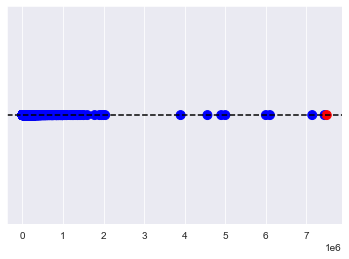

In [49]:
#Deteccion de Outliers, , a continuacion se analiza la distribucion de los ingresos anuales
ingresos=Tabla_Features_df['Ingresos_Anuales']
ingresos_array=np.array(ingresos)
ingresos_unique, counts= np.unique(ingresos_array, return_counts=True)

sizes = 80
colors = ['blue']*len(ingresos_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(ingresos_unique, np.ones(len(ingresos_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

Concusion: se considera como outliers aquellos ingresos mayores a 350.000  anuales,  lo cual da un tototal ede 1.312 prestamos , cuyos salarios anuales suman en total  749.997.054 

In [50]:

ingresos=Tabla_Features_df['Ingresos_Anuales']>350000.00
outliers=Tabla_Features_df[ingresos].Ingresos_Anuales
outliers

1467      525000.0
1811      365000.0
1814      550000.0
2968      408000.0
3226      400000.0
            ...   
465283    375000.0
465412    480000.0
465577    650000.0
465729    850000.0
466008    435828.0
Name: Ingresos_Anuales, Length: 1312, dtype: float64

In [51]:
outliers.sum()

749997054.0500001

In [69]:
# se procede a borrar estas 1.312 filas  del data frame y del Target
variables=outliers.index.tolist()
Tabla_Features_df1=Tabla_Features_df.drop(variables)
Target=Target.drop(variables)

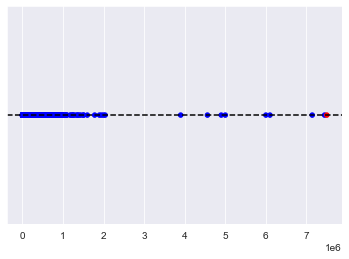

In [53]:
#la nueva distribucion de los ingresos anuales seria de la  siguiente manera:

ingresos=Tabla_Features_df['Ingresos_Anuales']
ingresos_array=np.array(ingresos)
ingresos_unique, counts= np.unique(ingresos_array, return_counts=True)

sizes = 20
colors = ['blue']*len(ingresos_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(ingresos_unique, np.ones(len(ingresos_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

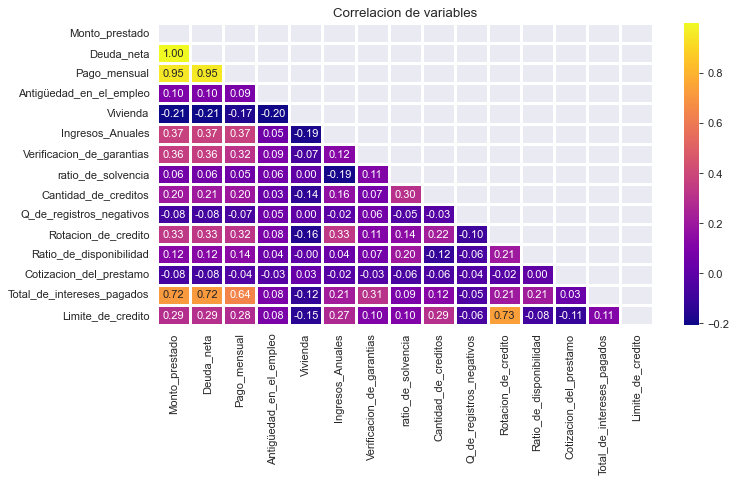

In [54]:
#Correlaciones de variables
plt.figure(dpi = 80,figsize= (10,5))
mask = np.triu(np.ones_like(Tabla_Features_df.corr(),dtype = bool))
sns.heatmap(Tabla_Features_df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlacion de variables')
plt.show()

En el grafico de correlacion de variables, se puede percibir las siguientes correlaciones:

Alta correlacion
*   Monto_prestado/Deuda_neta
*   Monto_prestado/Pago_mensual
*   Deuda_neta/Pago_mensual

Correlacion media


*   Monto_prestado/Total_de_intereses_pagados
*   Deuda_neta/Total_de_intereses_pagados
*   Pago_mensual/Total_de_intereses_pagados
*   Rotacion_del_credito/Limite_de_credito

Correlacion Normal

Un total de 27 correlaciones en el rango de 0.20 y 0.40









Analisis Bivariado

**#Cual es la relacion entre el Pago Mensualy el Monto de  Prestado?**

<AxesSubplot:xlabel='Pago_mensual', ylabel='Monto_prestado'>

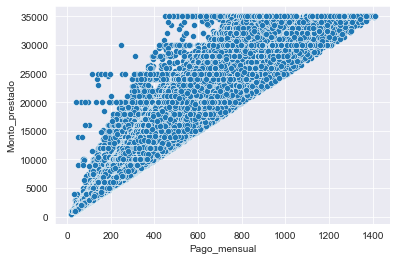

In [55]:
sns.scatterplot(Tabla_Features_df['Pago_mensual'], Tabla_Features_df['Monto_prestado'])

**Respuesta=** La relacion es Positiva a mayor Monto prestado, mayor es la cantidad pagada

**Cual es la relacion entre la Antiguedad en el empleo y el monto prestado?**

<AxesSubplot:xlabel='Antigüedad_en_el_empleo', ylabel='Monto_prestado'>

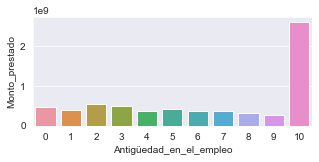

In [56]:
cat = Tabla_Features_df[['Antigüedad_en_el_empleo','Monto_prestado']].groupby(['Antigüedad_en_el_empleo'], as_index=False).sum().sort_values(by='Monto_prestado', ascending=False)
plt.figure(figsize=(5,2))
sns.barplot(x='Antigüedad_en_el_empleo', y='Monto_prestado', data=cat)

Respuesta= no hay una relacion lineal entre la antiguedad  y el monto prestado,  el gran salto es  a partir de los 10 años

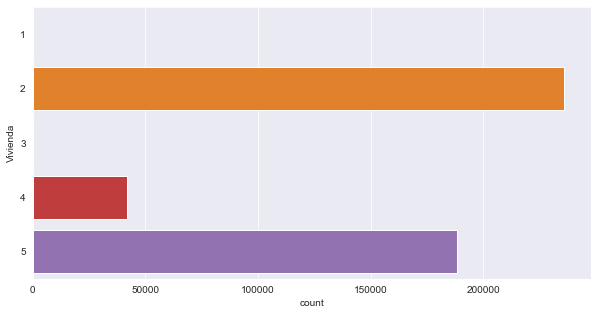

In [57]:
# Tipo de vivienda de las personas que tienen un prestamo
plt.figure(figsize=(10,5))
sns.countplot(y='Vivienda',data=tabla)
plt.show()

respuesta= se ha transformado a  numerica las variables categoricas, la relacion es la siguiente>>> A**NY and OTHER** texto en negrita=1, **MORTGAGE**=2, **NONE**=3, **OWN**=4, **RENT**=5
La mayor cabtidad de gente con prestamo tiene una hipoteca, luego le siguen las personas que alquilan y por ultimo  se encuentra el grupo que es propietario de una vivienda

**Cual es la relacion entre los montos prestados y su categoria bueno o malo?**

In [58]:
# categoria 0 son las malas el 1 es categoria bueno
#fig = px.violin(Tabla_Features, x="bueno_malo", y="Monto_prestado",box=True)
#fig.show()

la media prestada es de 11.000 aproximado, llegando como limite a 35.000 en cualquiera de los dos casos.

In [59]:

#fig = px.pie(Tabla_Features, names="bueno_malo",values='Monto_prestado')
#fig.show()

**Respuesta**= La media de los dos grupos es la misma, pero la cantidad de prestamos otorgados al grupo malo es inferior al grupo bueno, es decir ,  no se ve un riesgo en el procedimiento de otorgamiento del credito

Cual es la media entre los prestamos  otorgados sin verificar las garantias  contras los que si se verificaron?

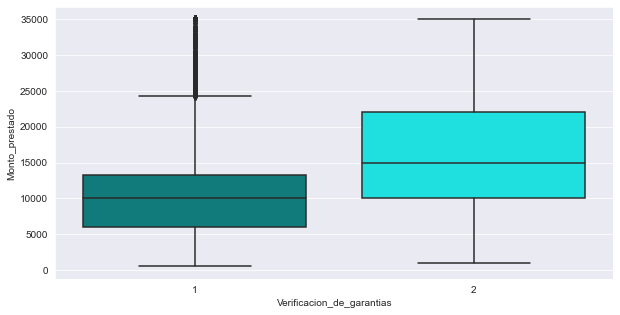

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Verificacion_de_garantias',y="Monto_prestado",data=Tabla_Features_df,palette=['#008B8B','#00FFFF'])
plt.show()

Respuesta=  la media es de 10.000 en los prestamos en los que no se verifico la garantia contra 15.000 de los que si se  verificaron, en ningun caso   pasan de los 35.000 otorgados

### **Seleccion de modelo**

 A continuación vamos a determinar cuáles son los modelos mas apropiados para nustro data set

Descargamos  las librerias relacionadas a los algoritmos de clasiifcacion

In [61]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [70]:
#Seleccionamos las variables a utilizar
X_np,y_np=Tabla_Features_df1,Target

In [71]:
# transformamos a numpy las variables
X_np=X_np.to_numpy()
y_np=y_np.to_numpy()

In [72]:
#Me quedo con 30% para test y 70% para train
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
X_train_np, X_test_np, y_train_np, y_test_np= train_test_split(X_np,y_np, test_size=0.3, random_state=42) 


In [73]:
#cargamos los modelos a considerar
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
neural_classifier= MLPClassifier(random_state=1, max_iter=300,activation='logistic')
tree_classifier= DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=200, min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0,max_features='log2',random_state=5,max_leaf_nodes=100,class_weight='balanced')
knn_classifier= KNeighborsClassifier(n_neighbors=5,weights='distance')
random_forest= RandomForestClassifier(n_estimators=100,max_depth=20,criterion='entropy')
logistic_regression = LogisticRegression(random_state=0)
#svm = make_pipeline(StandardScaler(), SVR(kernel='poly',C=1,gamma='auto',degree=3, epsilon=.1,coef0=1))   
#svm= SVR(kernel='linear', C=1.0, gamma='auto')

In [74]:
# Comparamos los modelos usando el error medio cuadratico
from sklearn.metrics import accuracy_score
modelo=[tree_classifier,random_forest,knn_classifier,neural_classifier,logistic_regression]
resultado=[]
for curr in modelo:
  print(curr)
  curr.fit(X_train_np,y_train_np)
  y_pred=curr.predict(X_test_np)
  resultado.append(accuracy_score(y_test_np,y_pred))
  
result=pd.DataFrame([])
result['modelo']=['tree_classifier','random_forest','knn_classifier','neural_classifier','logistic_regression']
result['resultado']=resultado

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=200, max_features='log2', max_leaf_nodes=100,
                       min_weight_fraction_leaf=0, random_state=5)
RandomForestClassifier(criterion='entropy', max_depth=20)
KNeighborsClassifier(weights='distance')
MLPClassifier(activation='logistic', max_iter=300, random_state=1)
LogisticRegression(random_state=0)


Se realiza la comparación entre diferentes modelos

In [75]:
result.sort_values('resultado')

,modelo,resultado
0,tree_classifier,0.639090
2,knn_classifier,0.877971
4,logistic_regression,0.890610
3,neural_classifier,0.891270
1,random_forest,0.892417


Conclusion=Segun el analisis realizado el módelo con mayor accuracy es el de random forest

Analisis Modelo de Random Forest

In [76]:
X,y=Tabla_Features_df1,Target

In [77]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [78]:
from sklearn.ensemble import RandomForestClassifier
#checar el max_depth
randomForest= RandomForestClassifier(n_estimators=100,max_depth=20,criterion='entropy') #Creamos el modelo


In [79]:
#Entrenamos el modelo
#randomForest.fit(X_train,y_train) #Entrenamos el modelo
randomForest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [80]:
y_train_pred = randomForest.predict(X_train) #Prediccion en Train
y_test_pred = randomForest.predict(X_test) #Prediccion en Test

In [81]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9171779612327601
% de aciertos sobre el set de evaluación: 0.8922232099331862


[[   197  14970]
 [    64 124261]]


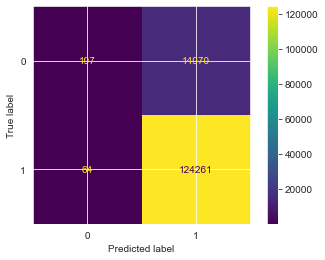

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(randomForest,X_test, y_test)
plt.show()

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#import urllib.request

Curva Roc

In [83]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = randomForest.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

AUC for our classifier is: 0.6957457966034322


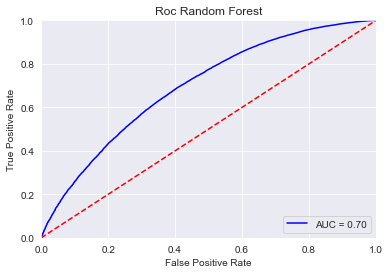

In [84]:
# Gráfica de la Curva ROC
plt.title('Roc Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()